<a href="https://colab.research.google.com/github/pramanand-coder/Machine-Learning/blob/main/blockbuster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("/content/databl.xlsx")

In [3]:
data.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-06-01 00:00:00,East,Martha,Alexander,Television,95,1198.0,113810.0
1,1-23-18,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0
2,2018-09-02 00:00:00,Central,Hermann,Luis,Television,36,1198.0,43128.0
3,2-26-18,Central,Timothy,David,Cell Phone,27,225.0,6075.0
4,3-15-18,West,Timothy,Stephen,Television,56,1198.0,67088.0


In [4]:
data.columns

Index(['OrderDate', 'Region', 'Manager', 'SalesMan', 'Item', 'Units',
       'Unit_price', 'Sale_amt'],
      dtype='object')

In [5]:
data.isnull().sum()

OrderDate     0
Region        0
Manager       0
SalesMan      0
Item          0
Units         0
Unit_price    0
Sale_amt      0
dtype: int64

In [6]:
data.describe()

,Units,Unit_price,Sale_amt
count,43.000000,43.000000,43.000000
mean,49.325581,581.011628,30364.546512
std,30.078248,442.285830,32424.588323
min,2.000000,58.500000,250.000000
25%,27.500000,225.000000,3978.000000
50%,53.000000,500.000000,17100.000000
75%,74.500000,1198.000000,42529.000000
max,96.000000,1198.000000,113810.000000


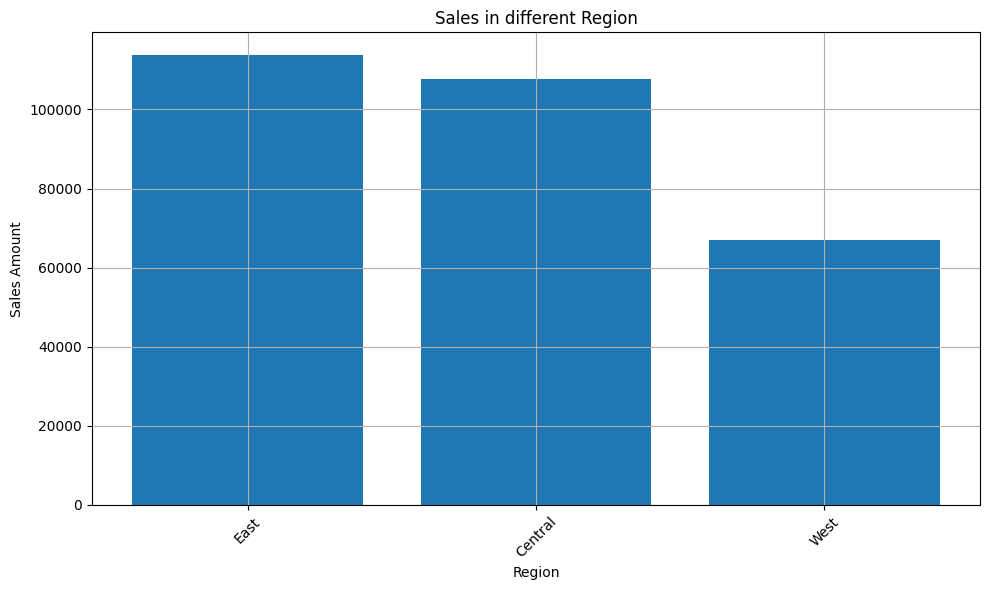

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(data['Region'], data['Sale_amt'])
plt.title('Sales in different Region')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

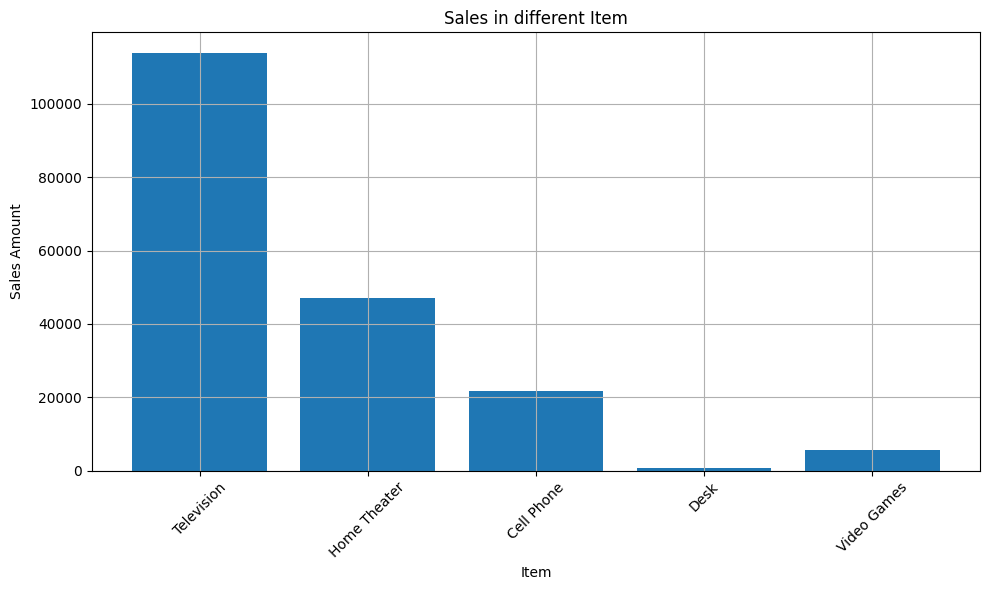

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(data['Item'], data['Sale_amt'])
plt.title('Sales in different Item')
plt.xlabel('Item')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
data['OrderDate']=pd.to_datetime(data['OrderDate'])

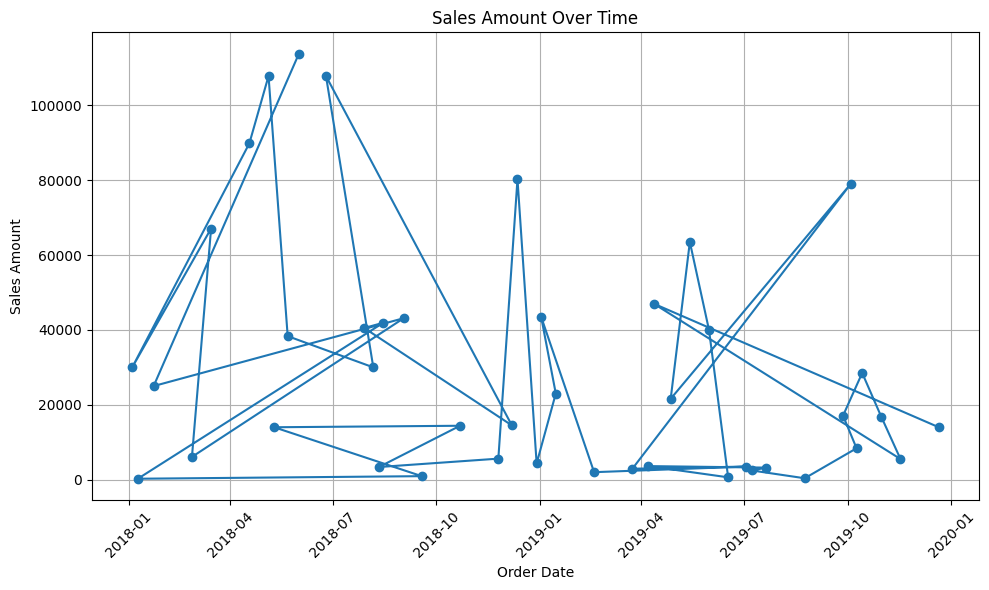

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data['OrderDate'], data['Sale_amt'], marker='o', linestyle='-')
plt.title('Sales Amount Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
data = pd.get_dummies(data, columns=['Region', 'Manager', 'SalesMan', 'Item'])

In [12]:
data.head()

,OrderDate,Units,Unit_price,Sale_amt,Region_Central,Region_East,Region_West,Manager_Douglas,Manager_Hermann,Manager_Marth,...,SalesMan_Michael,SalesMan_Shelli,SalesMan_Sigal,SalesMan_Stephen,SalesMan_Steven,Item_Cell Phone,Item_Desk,Item_Home Theater,Item_Television,Item_Video Games
0,2018-06-01,95,1198.0,113810.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2018-01-23,50,500.0,25000.0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,2018-09-02,36,1198.0,43128.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,2018-02-26,27,225.0,6075.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2018-03-15,56,1198.0,67088.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [13]:
data.dtypes

OrderDate             datetime64[ns]
Units                          int64
Unit_price                   float64
Sale_amt                     float64
Region_Central                 uint8
Region_East                    uint8
Region_West                    uint8
Manager_Douglas                uint8
Manager_Hermann                uint8
Manager_Marth                  uint8
Manager_Martha                 uint8
Manager_Timothy                uint8
SalesMan_Alexander             uint8
SalesMan_David                 uint8
SalesMan_Diana                 uint8
SalesMan_John                  uint8
SalesMan_Karen                 uint8
SalesMan_Luis                  uint8
SalesMan_Michael               uint8
SalesMan_Shelli                uint8
SalesMan_Sigal                 uint8
SalesMan_Stephen               uint8
SalesMan_Steven                uint8
Item_Cell Phone                uint8
Item_Desk                      uint8
Item_Home Theater              uint8
Item_Television                uint8
I

In [14]:
data['Sale_amt']=data['Sale_amt'].astype('int')
data['Unit_price']=data['Unit_price'].astype('int')

In [15]:
data['OrderDate'] =data['OrderDate'].apply(lambda x: x.toordinal())

In [16]:
y=data.Sale_amt
x=data.drop(['Sale_amt'],axis=1)

In [17]:
print(x.shape)
print(y.shape)

(43, 27)
(43,)


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=68)

**Model Training**

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error,r2_score
pred=model.predict(x_test)
print(mean_squared_error(pred,y_test))
print(r2_score(pred,y_test))

337938375.49429536
0.7092720216051039


In [21]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
print(mean_squared_error(pred,y_test))
print(r2_score(pred,y_test))

61241533.777777776
0.9294018505741095


In [22]:
X = data[['Units', 'Unit_price']]
y = data['Sale_amt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 519173129.8668322


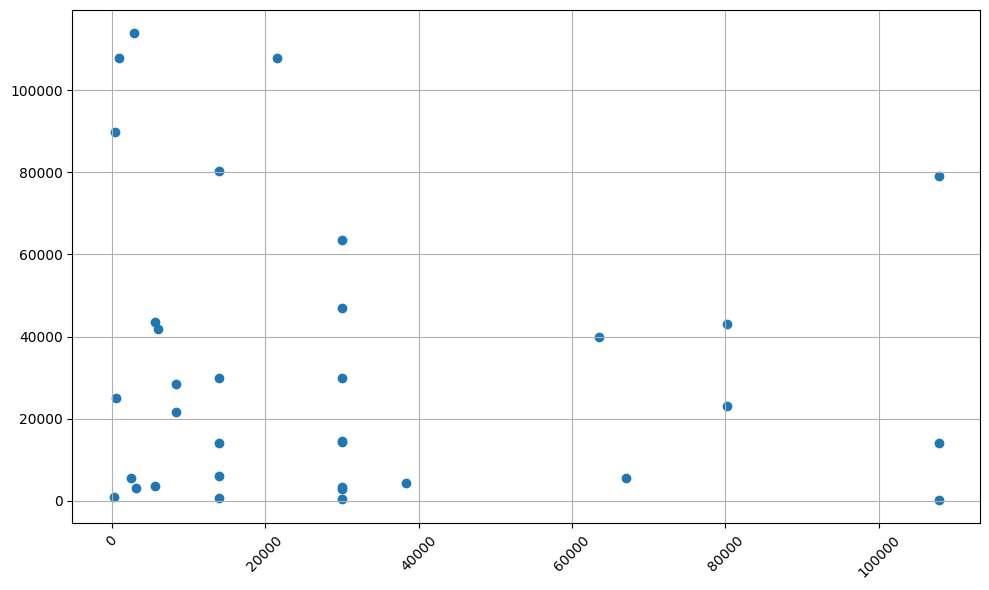

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(model1.predict(x_train),y_train)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()